# 1. Importation des packages

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

# 2. Chargement des donnees

In [54]:
data = pd.read_csv('Data/studentscores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyser les donnees

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [56]:
data.shape

(25, 2)

In [57]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<Axes: >

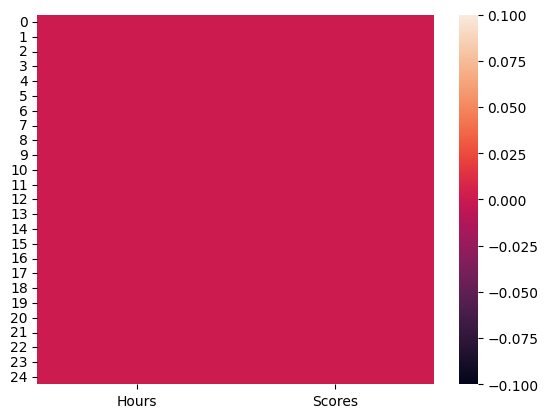

In [58]:
sns.heatmap(data.isnull())

# 5. Division des donneees : X et y

In [59]:
X = data.iloc[ : , :1]
y = data.iloc[ : , 1]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=46)

In [61]:
data.shape

(25, 2)

In [62]:
print("X-train:", X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-test:", y_test.shape)

X-train: (18, 1)
X-test: (7, 1)
y-train: (18,)
y-test: (7,)


# 6. Construction des modeles

In [63]:
# Creation du modele
modele_lr = LinearRegression()

In [64]:
# Entrainement du modele
modele_lr.fit(X_train, y_train)

LinearRegression()

In [65]:
# Faire de prediction
y_score_predits= modele_lr.predict(X_test)

In [66]:
y_test

3     75
1     47
15    95
24    86
4     30
13    42
14    17
Name: Scores, dtype: int64

In [67]:
r2_score(y_test, y_score_predits)

0.9353999862219735

# 7. Visualisation de la ligne de la Regression

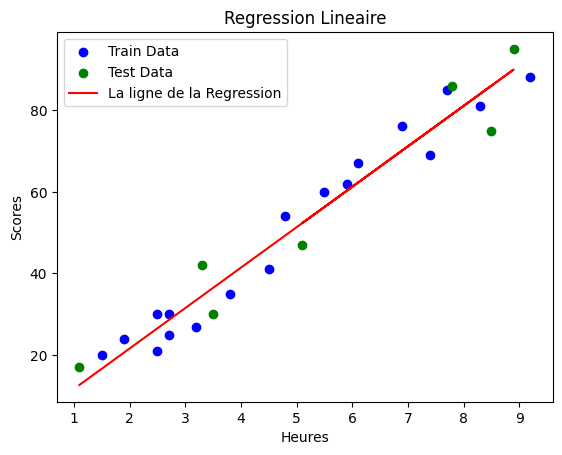

In [68]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_score_predits, color='red', label='La ligne de la Regression')
plt.xlabel('Heures')
plt.ylabel('Scores')
plt.title('Regression Lineaire')
plt.legend()

In [69]:
modele_lr.predict(X_test)

array([85.98448617, 52.30845349, 89.94637237, 79.05118532, 36.4609087 ,
       34.4799656 , 12.68959151])

In [70]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [71]:
modele_lr.predict([[2.5]])

array([26.55619321])

Proof

In [74]:
b0 = modele_lr.intercept_

In [75]:
b1 = modele_lr.coef_

In [76]:
# socre = b0 + b1 * Heures
Score = b0 + b1 * 2.5

In [77]:
Score

array([26.55619321])